In [1]:
import cv2
import easyocr
from IPython.display import display
import numpy as np
from PIL import Image

In [2]:
reader = easyocr.Reader(['es'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [32]:
image = cv2.imread('C:/Users/57301/Pictures/apuesta perdida.jpg') 

In [33]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

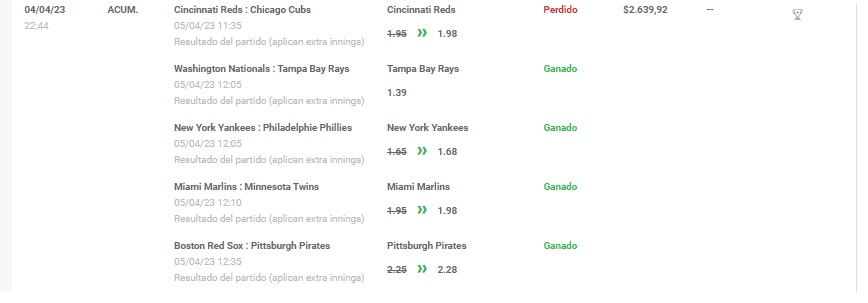

In [34]:
display(Image.fromarray(image))

In [35]:
result = reader.readtext(image)

In [36]:
for res in result:
    print(res)

([[23, 5], [67, 5], [67, 17], [23, 17]], '04/04/23', 0.9962205976043876)
([[107, 5], [141, 5], [141, 17], [107, 17]], 'ACUM', 0.9996020793914795)
([[174, 6], [242, 6], [242, 14], [174, 14]], 'CincinnatReds', 0.5968314320514791)
([[249, 5], [311, 5], [311, 17], [249, 17]], 'Chicago Cubs', 0.9973665484293184)
([[385, 5], [457, 5], [457, 17], [385, 17]], 'Cincinnati Reds', 0.9841076624111196)
([[543, 3], [581, 3], [581, 17], [543, 17]], 'Perdido', 0.9999357482279202)
([[621, 5], [671, 5], [671, 17], [621, 17]], '52.639,92', 0.8219989240615244)
([[24, 22], [50, 22], [50, 30], [24, 30]], '224', 0.9365158978870249)
([[173, 19], [245, 19], [245, 33], [173, 33]], '05/04/23 11.35', 0.6743219307708388)
([[385, 29], [409, 29], [409, 41], [385, 41]], '195', 0.7126697215450982)
([[173, 35], [367, 35], [367, 49], [173, 49]], 'Resultado del pertido (eplican extra inninge)', 0.3882332025196663)
([[172, 61], [273, 61], [273, 78], [172, 78]], 'Washington Nationals', 0.9972889407960172)
([[309, 63], [353

In [11]:
import torch
import pytesseract
from matplotlib import pyplot as plt

In [18]:
# Ruta al archivo de pesos pre-entrenados de YOLOv5
yolo_weights = 'C:/Users/57301/images/modelos/mecatear/best.pt'

# Cargar el modelo YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'custom', yolo_weights)

Using cache found in C:\Users\57301/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-2 Python-3.7.6 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [13]:
def detect_objects(image_path, class_name):
    # Cargar la imagen
    image = cv2.imread(image_path)

    # Realizar la detección de objetos con YOLOv5
    results = model(image)

    # Lista para almacenar los recuadros de interés
    rois = []

    # Obtener las detecciones de la clase especificada
    for det in results.xyxy[0]:
        _, _, _, _,_, class_id = det.tolist()

        # Si se encuentra una detección de la clase especificada, extraer el recuadro de interés
        if class_id == class_name:
            x, y, w, h = det[:4].int().tolist()
            roi = image[y:h, x:w]

            # Agregar el recuadro de interés a la lista
            rois.append(roi)

    # Mostrar las imágenes con los recuadros de interés
    for roi in rois:
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

    return rois

In [19]:
image_path = 'D:/proyectos_imagenes/Postobon/Maltero/Maltero1/Image2114529JPEG_002_070740_20230603_115436.jpg'

In [20]:
# Realizar la detección de objetos y obtener el recuadro de interés
rois = detect_objects(image_path,12)

c:\users\57301\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [69]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [21]:
type(rois[0])

numpy.ndarray

In [22]:
gray=cv2.cvtColor(rois[0],cv2.COLOR_BGR2GRAY)

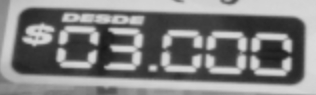

In [23]:
display(Image.fromarray(gray))

In [24]:
thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

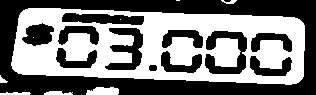

In [25]:
display(Image.fromarray(thresh))

In [28]:
result = reader.readtext(gray) 

In [29]:
for res in result:
    print(res)

([[15, 3], [304, 3], [304, 90], [15, 90]], 's6259', 0.18977859289858864)


In [87]:
result

[([[40, 0], [309, 0], [309, 92], [40, 92]], '60229', 0.16632707269524424)]

In [36]:
type(result)

list

In [41]:
result[0][1]

'0229'

In [52]:
denoi = cv2.GaussianBlur(thresh, (3, 3), 0)

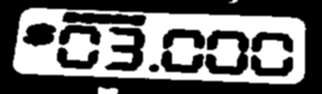

In [121]:
display(Image.fromarray(denoi))

In [54]:
result = reader.readtext(thresh)

In [55]:
result

[([[44, 4], [309, 4], [309, 93], [44, 93]], '0229', 0.1879439651966095)]

In [141]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [139]:
from pytesseract import Output

In [144]:
text = pytesseract.image_to_osd(gray,output_type=Output.DICT)

TesseractError: (1, 'UZN file C:\\Users\\57301\\AppData\\Local\\Temp\\tess_ig78sq6n loaded. Estimating resolution as 654 Too few characters. Skipping this page UZN file C:\\Users\\57301\\AppData\\Local\\Temp\\tess_ig78sq6n loaded. Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

In [202]:
text

''

In [117]:
result = reader.readtext(thresh) 

In [118]:
result

[([[152, 8], [315, 8], [315, 84], [152, 84]], 'Rsigein', 0.015146921887302513),
 ([[59, 107], [420, 107], [420, 197], [59, 197]],
  '~tgo DBary',
  0.0634861110417813),
 ([[1, 191], [443, 191], [443, 338], [1, 338]], 's8508', 0.29994050101083364)]

In [101]:
imagen_folder='D:/proyectos_imagenes/Postobon/Maltero/Maltero1/prueba.jpeg'

In [102]:
im=cv2.imread(imagen_folder)

In [103]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [106]:
result = reader.readtext(gray)

In [107]:
for res in result:
    print(res)

([[15, 3], [305, 3], [305, 89], [15, 89]], 's55259', 0.09897750521361931)


In [175]:
umbral = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,55,25)

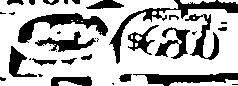

In [177]:
display(Image.fromarray(umbral))

In [158]:
import time

# Pruebas con frozen_east_text

In [145]:
network = cv2.dnn.readNet('frozen_east_text_detection.pb-master/frozen_east_text_detection.pb')

In [146]:
type(network)

cv2.dnn.Net

In [102]:
network.setInput(blob)

In [147]:
# Definimos los nombres de las capas de la red EAST que nos interesan.
EAST_OUTPUT_LAYER = [
    'feature_fusion/Conv_7/Sigmoid',
    'feature_fusion/concat_3'
]

In [148]:
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract.exe'

In [149]:
# Función que elimina los caracteres no ASCII del texto de entrada.
def cleanup_text(text):
    return ''.join([c if ord(c) < 128 else '' for c in text]).strip()

## Seguidamente, definiremos la función decode_precitions(), la cual se usa para convertir la salida de EAST en detecciones que podamos usar (una explicación más detallada se encuentra aquí):

In [150]:
def decode_predictions(scores, geometry, min_confidence=0.5):
    num_rows, num_cols = scores.shape[2:4]
    rectangles = []
    confidences = []

    # Iteramos sobre el número de filas
    for y in range(num_rows):
        # Extraemos las probabilidades y la data geométrica utilizada para potencialmente
        # derivar los rectángulos del texto detectado.
        scores_data = scores[0, 0, y]
        x_data_0 = geometry[0, 0, y]
        x_data_1 = geometry[0, 1, y]
        x_data_2 = geometry[0, 2, y]
        x_data_3 = geometry[0, 3, y]
        angles_data = geometry[0, 4, y]

        # Iteramos sobre las columnas
        for x in range(num_cols):
            # Extraemos el puntaje
            score = float(scores_data[x])

            # Si la detección es débil, la ignoramos.
            if score < min_confidence:
                continue

            # Calculamos el desfase dado que los resultados de la red serán 4 veces más pequeños
            # que la imagen original.
            offset_x, offset_y = x * 4., y * 4.

            # Extraemos el ángulo de rotación y calculamos el seno y el coseno del mismo
            angle = angles_data[x]
            cosine = np.cos(angle)
            sine = np.sin(angle)

            # Derivamos el ancho y la altura del rectángulo
            height = x_data_0[x] + x_data_2[x]
            width = x_data_1[x] + x_data_3[x]

            # Usamos el desfase y el ángulo de rotación para comenzar el cálculo del rectángulo rotado.
            offset = ([
                offset_x + (cosine * x_data_1[x]) + (sine * x_data_2[x]),
                offset_y - (sine * x_data_1[x]) + (cosine * x_data_2[x])
            ])

            # Derivamos las esquinas del rectángulo
            top_left = (-sine * height) + offset[0], (-cosine * height) + offset[1]
            top_right = (-cosine * width) + offset[0], (sine * width) + offset[1]

            # Calculamos el centro del rectángulo
            center_x = .5 * (top_left[0] + top_right[0])
            center_y = .5 * (top_left[1] + top_right[1])

            box = ((center_x, center_y), (width, height), -1 * angle * 180. / np.pi)

            rectangles.append(box)
            confidences.append(score)

    return rectangles, confidences

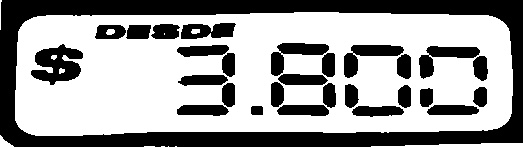

In [220]:
# Cargamos la imagen de entrada.
imagepath='D:/Analitica/easyocr/thresh.jpg'
image_2 = cv2.imread(imagepath)
display(Image.fromarray(image_2)) 

In [221]:
# Extraemos las dimensiones de la imagen
original_height, original_width = image_2.shape[:2] 

In [222]:
# Fijamos las nuevas dimensiones y calculamos el ratio entre las dimensiones viejas y nuevas
width,height=320,320
new_width, new_height = width, height
ratio_width = original_width / float(new_width)
ratio_height = original_height / float(new_height)

In [223]:
# Convertimos la imagen en un blob y la pasamos por la red.
blob = cv2.dnn.blobFromImage(image_2, 1., (new_width, new_height), (123.68, 116.78, 103.94), swapRB=True, crop=False)
start = time.time()
network.setInput(blob)
scores, geometry = network.forward(EAST_OUTPUT_LAYER)
end = time.time()

In [224]:
# Imprimimos el tiempo que tomó la detección
print(f'La detección se demoró {end - start:.6f} segundos.')

La detección se demoró 0.324178 segundos.


In [225]:
# Decodificamos las predicciones y aplicamos NMS.
rectangles, confidences = decode_predictions(scores, geometry, min_confidence=0.5)
indices = cv2.dnn.NMSBoxesRotated(rectangles, confidences, 0.5, 0.4)

## Iteramos sobre las detecciones restantes, y almacenaremos los resultados en las lista results. Para cada detección, computamos las esquinas del rectángulo asociado a la misma:

In [226]:
results = []

# Iteramos sobre las detecciones que quedan
for i in indices.flatten():
    # Computamos las esquinas del rectángulo.
    box = cv2.boxPoints(rectangles[i])
    box[:, 0] *= ratio_width
    box[:, 1] *= ratio_height
    box = np.int0(box)

In [227]:
  # Tesseract solo puede aplicar OCR sobre rectángulos "normales", no rotados, por lo que tenemos que llevar a cabo
    # dicha transformación
x, y, w, h = cv2.boundingRect(box)

In [233]:
    # Aplicamos un poco de padding para potencialmente mejorar los resultados del OCR
delta_x = int(w * 0.0)
delta_y = int(h * 0.0)

    # Aplicamos el padding
x_start = max(0, x - delta_x)
y_start = max(0, y - delta_y)
x_end = min(original_width, x + w + (delta_x * 2))
y_end = min(original_height, y + h + (delta_y * 2))

## Después, extraemos el ROI y lo pasamos por Tesseract para obtener el texto:

In [234]:
# Extraemos el ROI con padding
padded_roi = image_2[y_start:y_end, x_start:x_end]

# Extraemos el texto de la región
text = pytesseract.image_to_string(padded_roi, config='--psm 7')

In [236]:
# Añadimos el resultado a la lista.
results.append((box, text))

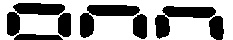

In [237]:
display(Image.fromarray(padded_roi))   

In [232]:
text 

'wT ee es "8\n'

In [116]:
layerNames = ["feature_fusion/Conv_7/Sigmoid","feature_fusion/concat_3"]

In [117]:
(H, W) = rois[0].shape[:2]

(newW, newH) = (320, 320)
rW = W / float(newW)
rH = H / float(newH)

image = cv2.resize(rois[0], (newW, newH))
(H, W) = rois[0].shape[:2]

In [120]:
blob = cv2.dnn.blobFromImage(rois[0], 1., (320,320), (123.68, 116.78, 103.94), swapRB=True, crop=False)

In [121]:
network.setInput(blob)
(scores, geometry) = network.forward(layerNames)

In [105]:
thresh.shape[:2]

(148, 198)

In [122]:
(numRows, numCols) = scores.shape[2:4]
rects = []
confidences = []

In [123]:
from imutils.object_detection import non_max_suppression

In [130]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [135]:
for y in range(0, numRows):
    orig=rois[0]

    scoresData = scores[0, 0, y]
    xData0 = geometry[0, 0, y]
    xData1 = geometry[0, 1, y]
    xData2 = geometry[0, 2, y]
    xData3 = geometry[0, 3, y]
    anglesData = geometry[0, 4, y]

# loop over the number of columns
    for x in range(0, numCols):
    # if our score does not have sufficient probability, ignore it
        if scoresData[x] < 0.5:
            continue

        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)

        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])

    boxes = non_max_suppression(np.array(rects), probs=confidences)
    
    for (startX, startY, endX, endY) in boxes:

        startX = int(startX * rW)
        startY = int(startY * rH)
        endX = int(endX * rW)
        endY = int(endY * rH)
        boundary = 2

        text = orig[startY-boundary:endY+boundary, startX - boundary:endX + boundary]
        text = cv2.cvtColor(text.astype(np.uint8), cv2.COLOR_BGR2GRAY)
        textRecongized = reader.readtext(rois[0])
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 3)
        orig = cv2.putText(orig, textRecongized, (endX,endY+5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'putText'
> Overload resolution failed:
>  - Can't convert object to 'str' for 'text'
>  - Can't convert object to 'str' for 'text'


In [136]:
textRecongized

[([[57, 37], [189, 37], [189, 80], [57, 80]], 'YuiuirO', 0.10957594833221644),
 ([[46, 80], [171, 80], [171, 129], [46, 129]], 'Sru0', 0.11275313049554825)]

In [132]:
type(orig)

numpy.ndarray

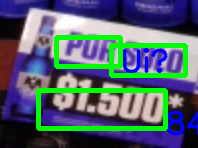

In [133]:
display(Image.fromarray(orig))